In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df2 = pd.read_csv('~/Desktop/coursework/data/stage1/chrom_len.tsv',
                sep='\t')
df2 = df2.iloc[1:-1]
df3 = df2[['chrom', 'Molecule']]
df3.head()

,chrom,Molecule
1,NC_044211.2,Chromosome 1
2,NC_044212.2,Chromosome 1A
3,NC_044213.2,Chromosome 2
4,NC_044214.2,Chromosome 3
5,NC_044215.2,Chromosome 4


In [3]:
path_to_data='/Users/aleksandradenisova/Desktop/coursework/data/'

In [4]:
!ls /Users/aleksandradenisova/Desktop/coursework/data/final_data/april_11

fixed_inno.tsv    fixed_noninno.tsv two_alleles.tsv


In [5]:
'fixed_inno.tsv fixed_noninno.tsv two_alleles.tsv'.split()

['fixed_inno.tsv', 'fixed_noninno.tsv', 'two_alleles.tsv']

In [8]:
def plot(name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(22,12))

    df_fixed3['Chromosome'] = df_fixed3['Molecule'].apply(lambda x: x.split()[1])

    sns.stripplot(data = df_fixed3, x = 'start', y = 'Chromosome')

    plt.ylabel('Chromosome', fontsize=30)
    plt.xlabel('Position', fontsize=30)


    for k, mol in enumerate(df_fixed3['Molecule'].unique()):
        plt.hlines(k, 0, df2[df2['Molecule'] == mol]['Total Length'].values[0], color='gray', alpha=0.5)


    plt.savefig(f'/Users/aleksandradenisova/Desktop/coursework/pics/coursework/{name}.png', dpi=400)
    plt.show()

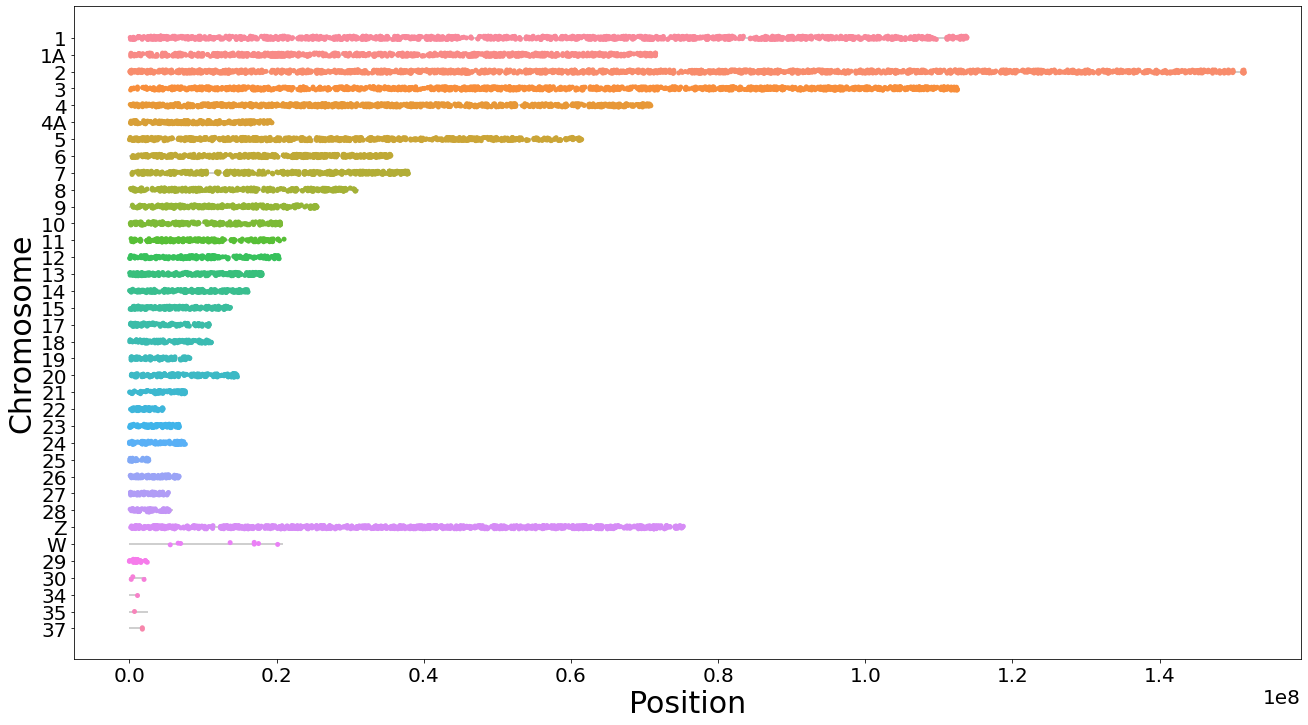

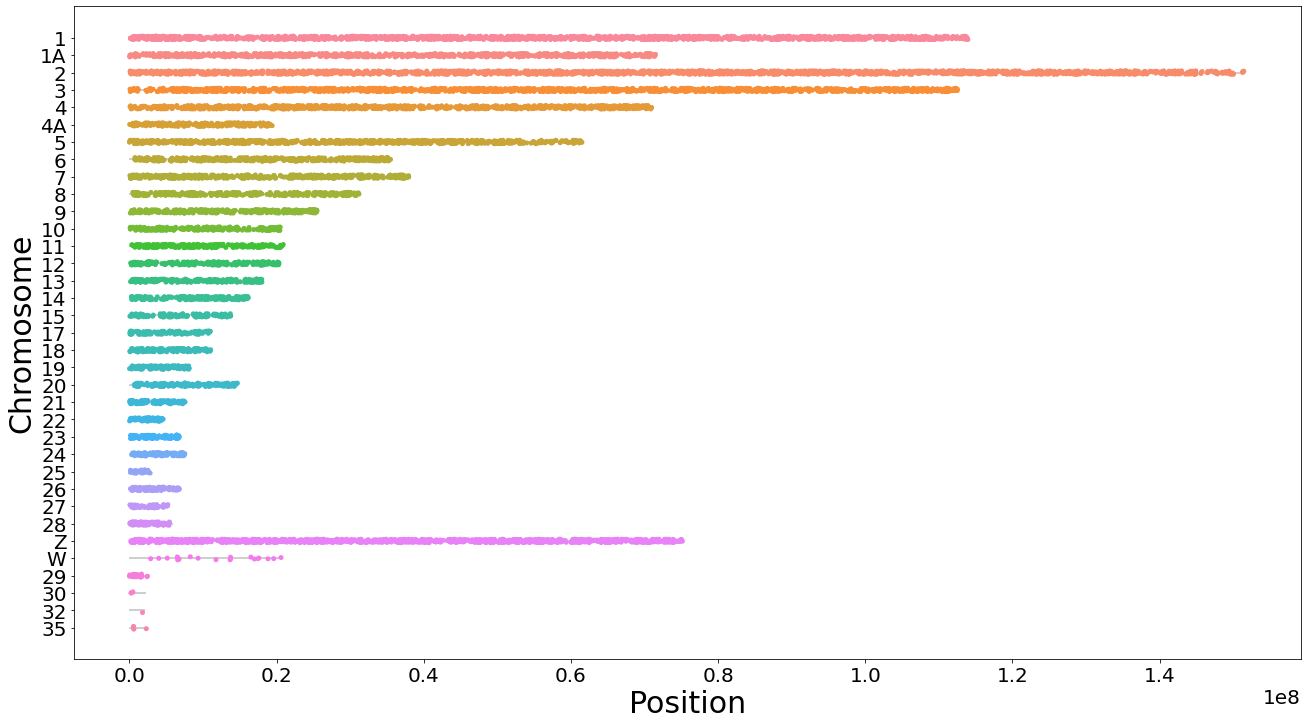

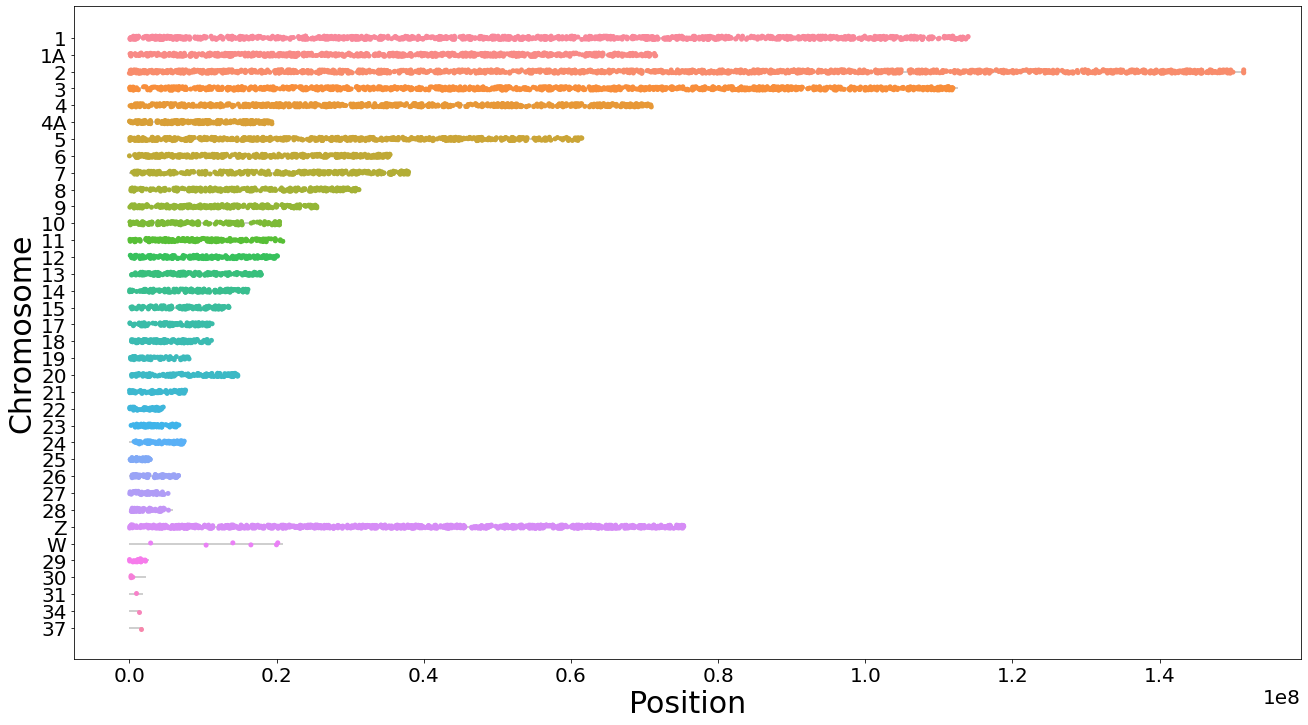

In [22]:
file_names = ['two_alleles.tsv', 'fixed_inno.tsv', 'fixed_noninno.tsv']
groups = ['1st', '2nd', '3rd']

list_all = []
for i in range(3):
    df = pd.read_csv(f'{path_to_data}final_data/{file_names[i]}', sep = '\t')
    df_fixed3 = pd.merge(df, df3, on = 'chrom')
    df_fixed3['Group'] = groups[i]
    list_all.append(df_fixed3)

    df = pd.DataFrame(df_fixed3[['Molecule', 'chrom']].value_counts(), columns=['counts']).reset_index()
    table = pd.pivot_table(df, values=['counts'], index=['Molecule', 'chrom']) 
    table.head()
    
    plot(file_names[i])

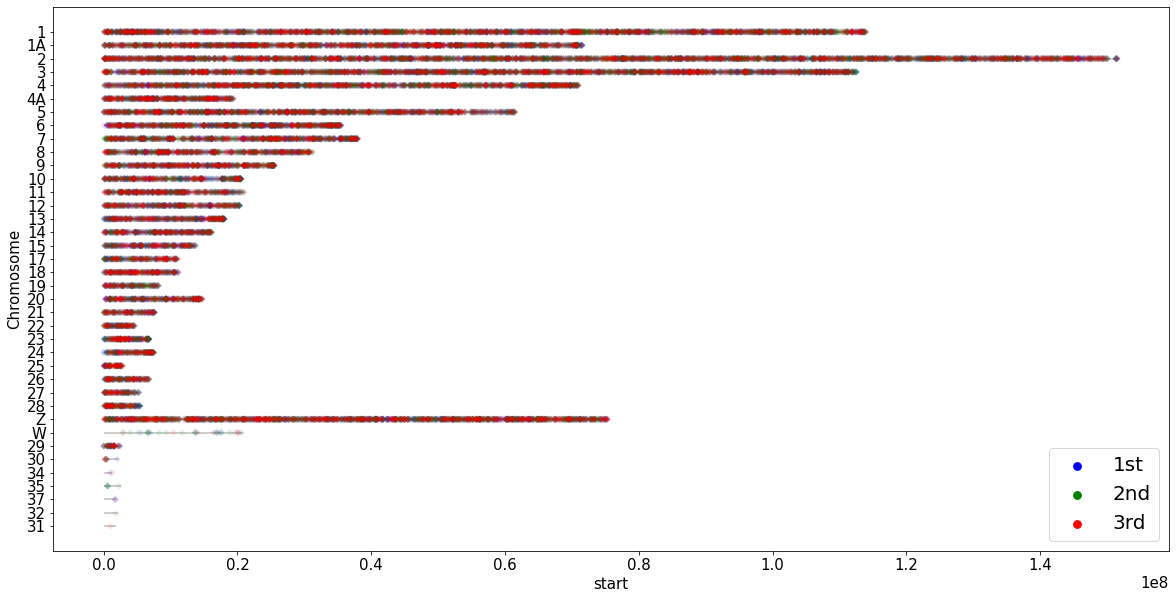

In [47]:
df_all = pd.concat(list_all)

def plot2(df_fixed3):
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(20,10))

    df_fixed3['Chromosome'] = df_fixed3['Molecule'].apply(lambda x: x.split()[1])

    sns.stripplot(data = df_fixed3,
                  x = 'start',
                  y = 'Chromosome',
                  hue = 'Group',
                  alpha = 0.1,
                  jitter=False,
                  palette=['blue', 'green', 'red'],
                  marker="D")
    
    plt.legend(fontsize=20)

    for k, mol in enumerate(df_fixed3['Molecule'].unique()):
        plt.hlines(k, 0, df2[df2['Molecule'] == mol]['Total Length'].values[0], color='gray', alpha=0.5)


    plt.savefig(f'/Users/aleksandradenisova/Desktop/coursework/pics/coursework/all.png', dpi=400)
    plt.show()
    
plot2(df_all)

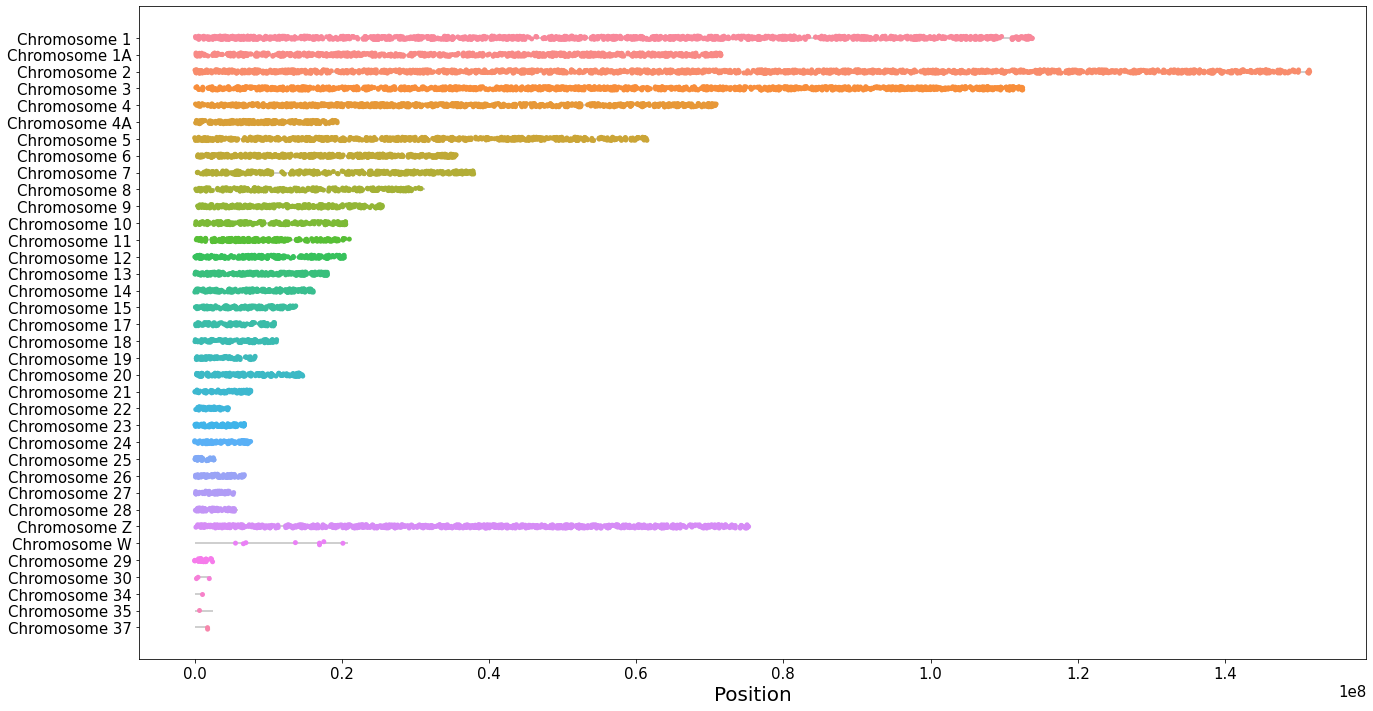

In [141]:
# cons_in_table = ['cons','inno','non_inno']

# for i in range(len(cons_in_table)):
#     df_fixed3 = df_fixed2[df_fixed2[cons_in_table[i]]==True]
#     plt.figure(figsize=(20,12))
#     sns.swarmplot(data = df_fixed3, x = 'start', y = 'Molecule', size=3)

#     for k, mol in enumerate(df_fixed3['Molecule'].unique()):
#         plt.hlines(k, 0, df2[df2['Molecule'] == mol]['Total Length'].values[0], color='gray', alpha=0.5)


#     plt.savefig('{}.png'.format(cons_in_table[i]), dpi=300)